# Quick Plot
Notebook for plotting the Pandas DataFrames straight from the hdf5 files that are produced by workflows/SUEPCoffea.py.
Offers a quicker alternative to `make_plots.py`, in particular for testing different selections on the distributions.

In [2]:
import os
import glob
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import hist
from hist import Hist
import mplhep as hep
import math
from tabulate import tabulate
import warnings
import scipy
import pandas as pd
from plot_utils import *

warnings.filterwarnings('ignore')
matplotlib.rcParams.update({'figure.max_open_warning': 0})
matplotlib.rcParams['figure.facecolor'] = 'white'
plt.rcParams['figure.dpi'] = 50
plt.style.use(hep.style.CMS)
hep.style.use("CMS")

In [3]:
# parameters
tag = 'May2023_A02_v2'
sample1 = 'JetHT+Run2018A-UL2018_MiniAODv2-v1+MINIAOD'
sample2 = 'JetHT+Run2018B-UL2018_MiniAODv2-v1+MINIAOD'
sample3 = 'JetHT+Run2018C-UL2018_MiniAODv2-v1+MINIAOD'
sample4 = 'JetHT+Run2018D-UL2018_MiniAODv2-v2+MINIAOD'
sample5 = 'JetHT+Run2017B-UL2017_MiniAODv2-v1+MINIAOD'
sample6 = 'JetHT+Run2017C-UL2017_MiniAODv2-v1+MINIAOD'
sample7 = 'JetHT+Run2017D-UL2017_MiniAODv2-v1+MINIAOD'
sample8 = 'JetHT+Run2017E-UL2017_MiniAODv2-v1+MINIAOD'
sample9 = 'JetHT+Run2017F-UL2017_MiniAODv2-v1+MINIAOD'

dataDir = '/data/submit/cms/store/user/{}/SUEP/{}/{}/merged/'
outDir = '/home/submit/lavezzo/public_html/SUEP/analysis/HEM/'
nFiles = 1

In [4]:
def readFromDir(dataDir, nFiles):
    for i, f in enumerate(os.listdir(dataDir)):
        if i == 0: df = pd.read_hdf(dataDir+f)
        else: df = pd.concat((df, pd.read_hdf(dataDir+f)))
        if i == nFiles: break
    return df

df18A = readFromDir(dataDir.format(os.environ['USER'], tag, sample1), nFiles)
df18B = readFromDir(dataDir.format(os.environ['USER'], tag, sample2), nFiles)
df18C = readFromDir(dataDir.format(os.environ['USER'], tag, sample3), nFiles)
df18D = readFromDir(dataDir.format(os.environ['USER'], tag, sample4), nFiles)
df17B = readFromDir(dataDir.format(os.environ['USER'], tag, sample5), nFiles)
df17C = readFromDir(dataDir.format(os.environ['USER'], tag, sample6), nFiles)
df17D = readFromDir(dataDir.format(os.environ['USER'], tag, sample7), nFiles)
df17E = readFromDir(dataDir.format(os.environ['USER'], tag, sample8), nFiles)
df17F = readFromDir(dataDir.format(os.environ['USER'], tag, sample9), nFiles)
    
# create output dir
if not os.path.isdir(outDir): 
    print("Creating", outDir)
    os.mkdir(outDir)

In [5]:
df18D.keys()

Index(['ntracks', 'ngood_fastjets', 'ht', 'ht_JEC', 'ht_JEC_JER_up',
       'ht_JEC_JER_down', 'ht_JEC_JES_up', 'ht_JEC_JES_down',
       'n_sel_electrons', 'n_sel_muons', 'n_sel_leps', 'HLT_PFHT1050',
       'ngood_ak4jets', 'PV_npvs', 'PV_npvsGood', 'SUEP_genMass', 'SUEP_genPt',
       'SUEP_genEta', 'SUEP_genPhi', 'SUEP_nconst_CL', 'SUEP_pt_avg_b_CL',
       'SUEP_S1_CL', 'SUEP_pt_avg_CL', 'SUEP_pt_CL', 'SUEP_eta_CL',
       'SUEP_phi_CL', 'SUEP_mass_CL', 'SUEP_delta_mass_genMass_CL',
       'SUEP_delta_pt_genPt_CL', 'SUEP_genEta_diff_CL', 'SUEP_genPhi_diff_CL',
       'SUEP_genR_diff_CL', 'ISR_nconst_CL', 'ISR_pt_avg_b_CL', 'ISR_S1_CL',
       'ISR_pt_avg_CL', 'ISR_pt_CL', 'ISR_eta_CL', 'ISR_phi_CL',
       'ISR_mass_CL'],
      dtype='object')

Here you can play with the `df` to make some quick studies.

In [6]:
dfSUEP_18A = df18A[(df18A['SUEP_phi_CL'] > -100)  & (df18A['ht_JEC'] > 1200)]
dfISR_18A = df18A[(df18A['ISR_phi_CL'] > -100)  & (df18A['ht_JEC'] > 1200)]

dfSUEP_18B = df18B[(df18B['SUEP_phi_CL'] > -100)  & (df18B['ht_JEC'] > 1200)]
dfISR_18B = df18B[(df18B['ISR_phi_CL'] > -100)  & (df18B['ht_JEC'] > 1200)]

dfSUEP_18C = df18C[(df18C['SUEP_phi_CL'] > -100)  & (df18C['ht_JEC'] > 1200)]
dfISR_18C = df18C[(df18C['ISR_phi_CL'] > -100)  & (df18C['ht_JEC'] > 1200)]

dfSUEP_18D = df18D[(df18D['SUEP_phi_CL'] > -100)  & (df18D['ht_JEC'] > 1200)]
dfISR_18D = df18D[(df18D['ISR_phi_CL'] > -100)  & (df18D['ht_JEC'] > 1200)]


dfSUEP_17B = df17B[(df17B['SUEP_phi_CL'] > -100)  & (df17B['ht_JEC'] > 1200)]
dfISR_17B = df17B[(df17B['ISR_phi_CL'] > -100)  & (df17B['ht_JEC'] > 1200)]

dfSUEP_17C = df17C[(df17C['SUEP_phi_CL'] > -100)  & (df17C['ht_JEC'] > 1200)]
dfISR_17C = df17C[(df17C['ISR_phi_CL'] > -100)  & (df17C['ht_JEC'] > 1200)]

dfSUEP_17D = df17D[(df17D['SUEP_phi_CL'] > -100)  & (df17D['ht_JEC'] > 1200)]
dfISR_17D = df17D[(df17D['ISR_phi_CL'] > -100)  & (df17D['ht_JEC'] > 1200)]

dfSUEP_17E = df17E[(df17E['SUEP_phi_CL'] > -100)  & (df17E['ht_JEC'] > 1200)]
dfISR_17E = df17E[(df17E['ISR_phi_CL'] > -100)  & (df17E['ht_JEC'] > 1200)]

dfSUEP_17F = df17F[(df17F['SUEP_phi_CL'] > -100)  & (df17F['ht_JEC'] > 1200)]
dfISR_17F = df17F[(df17F['ISR_phi_CL'] > -100)  & (df17F['ht_JEC'] > 1200)]


In [16]:

dfISR_17 = pd.concat((dfISR_17B,dfISR_17C,dfISR_17D,dfISR_17E,dfISR_17F))
dfISR_18 = pd.concat((dfISR_18A,dfISR_18B,dfISR_18C,dfISR_18D))
dfSUEP_18 = pd.concat((dfSUEP_18A,dfSUEP_18B,dfSUEP_18C,dfSUEP_18D))

<AxesSubplot: >

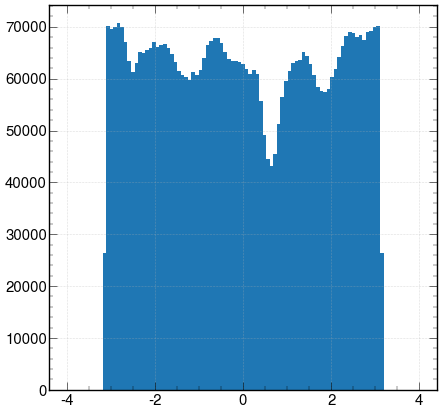

In [28]:
dfSUEP_D['SUEP_phi_CL'].hist(bins=np.linspace(-4,4,100))

Text(0.5, 1.0, '2018 A')

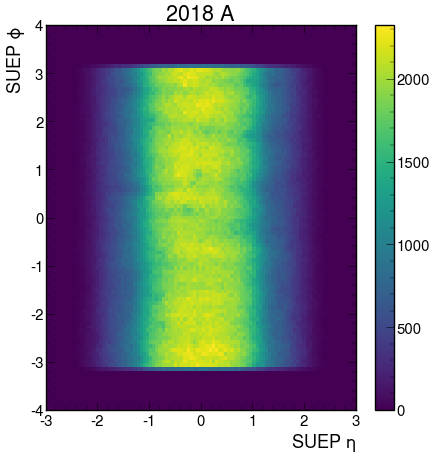

In [12]:
_ = plt.hist2d(dfA['SUEP_eta_CL'], dfA['SUEP_phi_CL'], bins = [np.linspace(-3,3,100), np.linspace(-4,4,100)])
plt.xlabel(r"SUEP $\eta$")
plt.ylabel(r"SUEP $\phi$")
plt.colorbar()
plt.title("2018 A")

Text(0.5, 1.0, '2018 a')

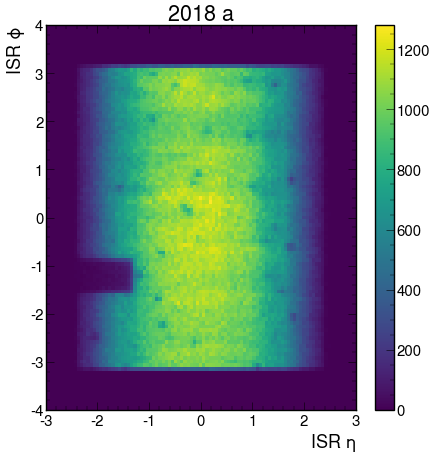

In [13]:
_ = plt.hist2d(dfISR_A['ISR_eta_CL'], dfISR_A['ISR_phi_CL'], bins = [np.linspace(-3,3,100), np.linspace(-4,4,100)])
plt.xlabel(r"ISR $\eta$")
plt.ylabel(r"ISR $\phi$")
plt.colorbar()
plt.title("2018 A")

[0.99009202 1.17471468 1.1059915  0.67287595        nan]


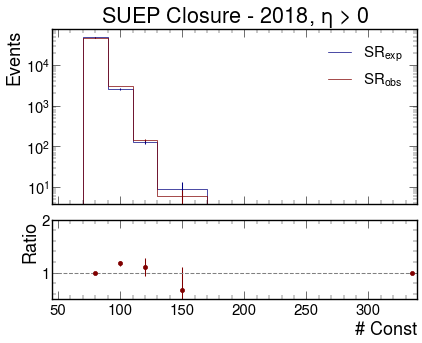

In [22]:
dfSUEP_18_cut = dfSUEP_18[(dfSUEP_18['ht_JEC'] > 1200) & (dfSUEP_18['SUEP_eta_CL'] > 0)]

h = Hist.new.Reg(100, 0, 1, name=f"SUEP_S1", label="$Sph_1$").Reg(
        501, 0, 500, name=f"SUEP_nconst", label="# Const"
    ).Weight()


h.fill(dfSUEP_18_cut['SUEP_S1_CL'], dfSUEP_18_cut['SUEP_nconst_CL'])


new_bins = [70, 90, 110, 130, 170, 500]
rebin = True
xregions = [0.3j, 0.4j, 0.5j, 1.0j]
yregions = [30j, 50j, 70j, 500j]

SR, SR_exp = ABCD_9regions_errorProp(h, xregions, yregions, sum_var='x')

if rebin:
    SR = rebin_piecewise(SR, new_bins)
    SR_exp = rebin_piecewise(SR_exp, new_bins)

print(SR.values()/SR_exp.values())

fig, axs = plot_ratio([SR_exp, SR], labels=["$SR_{exp}$", "$SR_{obs}$"])
axs[0].set_title(r"SUEP Closure - 2018, $\eta$ > 0")
# _ = axs[0].plot([],[],' ',label='KS p-value: {}'.format(round(ks.pvalue,3)))
_ = axs[1].set_ylim(0.5, 2)
# _ = axs[0].legend()
#print(axs[1].lines[0].get_ydata())
#print(axs[0].lines[0].get_ydata())

In [81]:
from scipy.stats import pearsonr

corr, p_value = pearsonr(dfISR_D['ISR_nconst_CL'], dfISR_D['ISR_S1_CL'])
print("ISR, 2018D", corr, p_value)
corr, p_value = pearsonr(dfISR_A['ISR_nconst_CL'], dfISR_A['ISR_S1_CL'])
print("ISR 2018A", corr, p_value)
corr, p_value = pearsonr(dfSUEP_A['SUEP_nconst_CL'], dfSUEP_A['SUEP_S1_CL'])
print("SUEP, 2018A", corr, p_value)
corr, p_value = pearsonr(dfSUEP_D['SUEP_nconst_CL'], dfSUEP_D['SUEP_S1_CL'])
print("SUEP, 2018D", corr, p_value)
corr, p_value = pearsonr(dfISR_17B['ISR_nconst_CL'], dfISR_17B['ISR_S1_CL'])
print("ISR, 2017B", corr, p_value)
corr, p_value = pearsonr(dfISR_17C['ISR_nconst_CL'], dfISR_17C['ISR_S1_CL'])
print("ISR, 2017C", corr, p_value)
corr, p_value = pearsonr(dfSUEP_17B['SUEP_nconst_CL'], dfSUEP_17B['SUEP_S1_CL'])
print("SUEP, 2017B", corr, p_value)
corr, p_value = pearsonr(dfSUEP_17C['SUEP_nconst_CL'], dfSUEP_17C['SUEP_S1_CL'])
print("SUEP, 2017C", corr, p_value)

ISR, 2018D 0.4292067270193465 0.0
ISR 2018A 0.42991902398357595 0.0
SUEP, 2018A 0.3479238762493253 0.0
SUEP, 2018D 0.34635458793980356 0.0
ISR, 2017B 0.42207227060080466 0.0
ISR, 2017C 0.42590718980475856 0.0
SUEP, 2017B 0.348010632254694 0.0
SUEP, 2017C 0.34872608103077996 0.0


In [ ]:
df_high = df[(df['SUEP_nconst_CL'] > 0) & (df['SUEP_pt_CL'] > 500) & (df['ht_JEC'] > 1200)]
df_low = df[(df['SUEP_nconst_CL'] > 0) & (df['SUEP_pt_CL'] <= 500) & (df['ht_JEC'] > 1200)]

Text(1, 0, 'SUEP_nconst_CL')

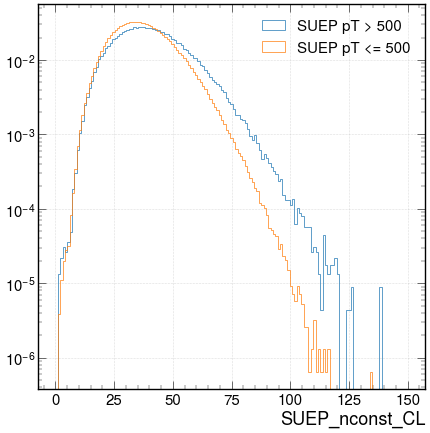

In [269]:
df_high['SUEP_nconst_CL'].hist(bins=np.linspace(0,150,150), histtype='step', density=True, label='SUEP pT > 500')
df_low['SUEP_nconst_CL'].hist(bins=np.linspace(0,150,150), histtype='step', density=True, label='SUEP pT <= 500')
plt.yscale('log')
plt.legend()
plt.xlabel('SUEP_nconst_CL')

Text(1, 0, 'SUEP_eta_CL')

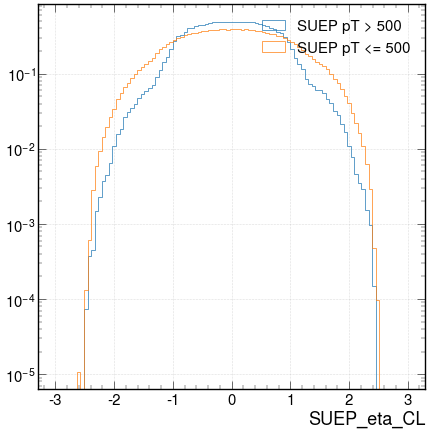

In [256]:
df_high['SUEP_eta_CL'].hist(bins=np.linspace(-3,3,100), histtype='step', density=True, label='SUEP pT > 500')
df_low['SUEP_eta_CL'].hist(bins=np.linspace(-3,3,100), histtype='step', density=True, label='SUEP pT <= 500')
plt.yscale('log')
plt.legend()
plt.xlabel("SUEP_eta_CL")

Text(1, 0, 'SUEP S1')

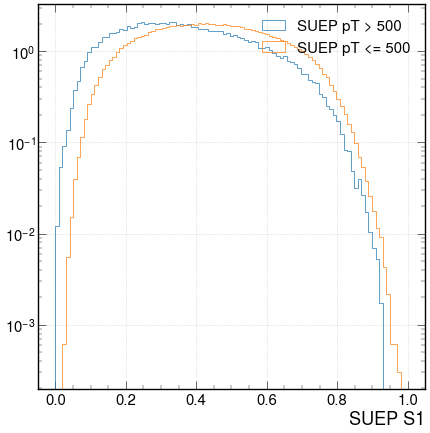

In [196]:
df_high['SUEP_S1_CL'].hist(bins=np.linspace(0,1,100), histtype='step', density=True, label='SUEP pT > 500')
df_low['SUEP_S1_CL'].hist(bins=np.linspace(0,1,100), histtype='step', density=True, label='SUEP pT <= 500')
plt.yscale('log')
plt.legend()
plt.xlabel("SUEP S1")

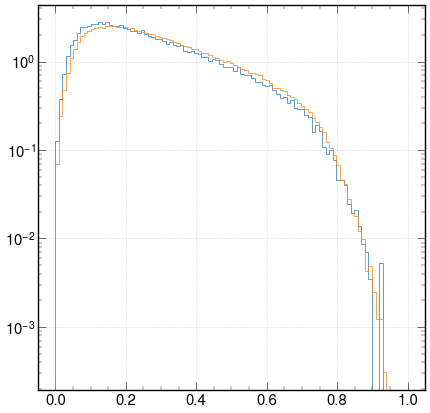

In [197]:
df_high['ISR_S1_CL'].hist(bins=np.linspace(0,1,100), histtype='step', density=True)
df_low['ISR_S1_CL'].hist(bins=np.linspace(0,1,100), histtype='step', density=True)
plt.yscale('log')

Text(1, 0, 'ntracks')

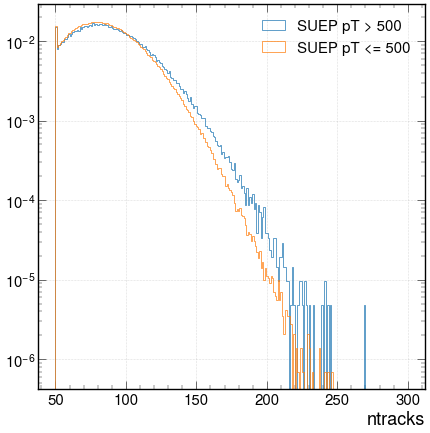

In [253]:
df_high['ntracks'].hist(bins=np.linspace(50,300,250), histtype='step', density=True, label='SUEP pT > 500')
df_low['ntracks'].hist(bins=np.linspace(50,300,250), histtype='step', density=True, label='SUEP pT <= 500')
plt.yscale('log')
plt.legend()
plt.xlabel('ntracks')

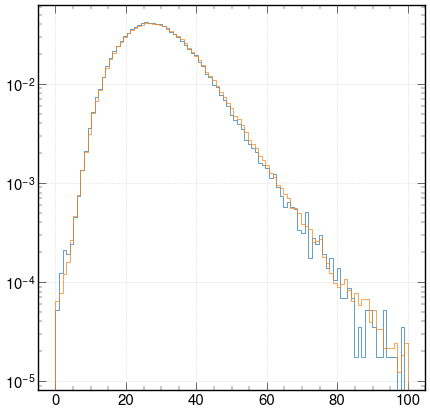

In [199]:
df_high['PV_npvs'].hist(bins=np.linspace(0,100,100), histtype='step', density=True)
df_low['PV_npvs'].hist(bins=np.linspace(0,100,100), histtype='step', density=True)
plt.yscale('log')

Text(1, 0, 'ISR_nconst_CL')

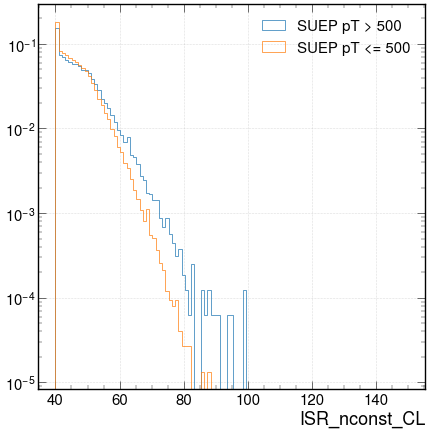

In [200]:
df_high['ISR_nconst_CL'].hist(bins=np.linspace(40,150,110), histtype='step', density=True, label='SUEP pT > 500')
df_low['ISR_nconst_CL'].hist(bins=np.linspace(40,150,110), histtype='step', density=True, label='SUEP pT <= 500')
plt.yscale('log')
plt.legend()
plt.xlabel('ISR_nconst_CL')

Text(1, 0, 'ISR_pt_CL')

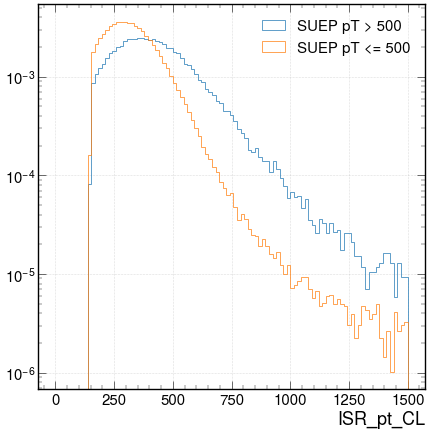

In [201]:
df_high['ISR_pt_CL'].hist(bins=np.linspace(0,1500,100), histtype='step', density=True, label='SUEP pT > 500')
df_low['ISR_pt_CL'].hist(bins=np.linspace(0,1500,100), histtype='step', density=True, label='SUEP pT <= 500')
plt.yscale('log')
plt.legend()
plt.xlabel('ISR_pt_CL')

In [249]:
df_highISR = df[(df['ISR_nconst_CL'] > 40) & (df['ISR_pt_CL'] > 500) & (df['ht_JEC'] > 1200)]
df_lowISR = df[(df['ISR_nconst_CL'] > 40) & (df['ISR_pt_CL'] <= 500) & (df['ht_JEC'] > 1200)]

Text(1, 0, 'ISR_nconst_CL')

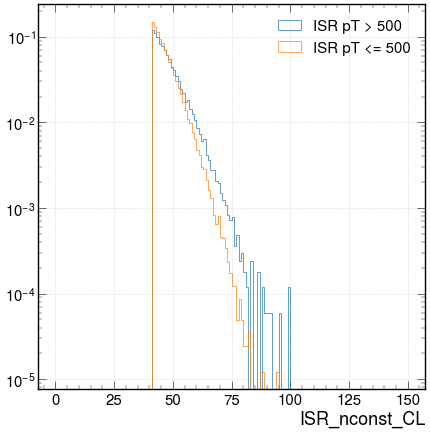

In [250]:
df_highISR['ISR_nconst_CL'].hist(bins=np.linspace(0,150,151), histtype='step', density=True, label='ISR pT > 500')
df_lowISR['ISR_nconst_CL'].hist(bins=np.linspace(0,150,151), histtype='step', density=True, label='ISR pT <= 500')
plt.yscale('log')
plt.legend()
plt.xlabel('ISR_nconst_CL')

Text(1, 0, 'SUEP_pt_avg_CL')

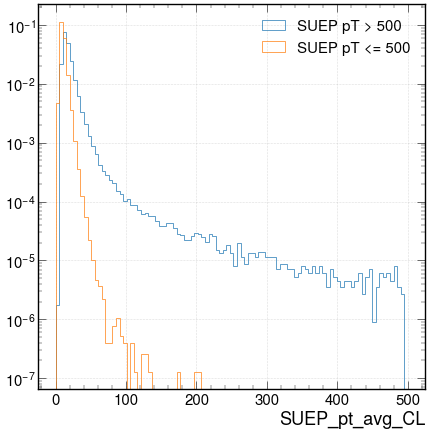

In [255]:
df_high['SUEP_pt_avg_CL'].hist(bins=np.linspace(0,500,100), histtype='step', density=True, label='SUEP pT > 500')
df_low['SUEP_pt_avg_CL'].hist(bins=np.linspace(0,500,100), histtype='step', density=True, label='SUEP pT <= 500')
plt.yscale('log')
plt.legend()
plt.xlabel('SUEP_pt_avg_CL')

Text(1, 0, 'SUEP_mass_CL')

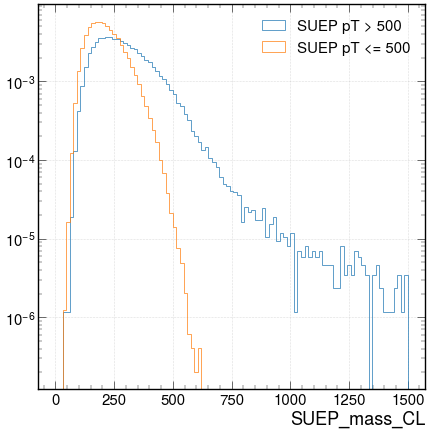

In [205]:
df_high['SUEP_mass_CL'].hist(bins=np.linspace(0,1500,100), histtype='step', density=True, label='SUEP pT > 500')
df_low['SUEP_mass_CL'].hist(bins=np.linspace(0,1500,100), histtype='step', density=True, label='SUEP pT <= 500')
plt.yscale('log')
plt.legend()
plt.xlabel('SUEP_mass_CL')

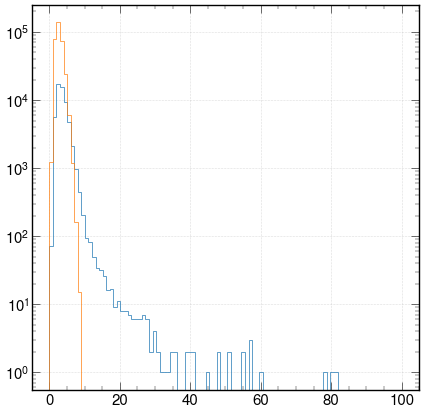

In [206]:
df_high['SUEP_pt_avg_b_CL'].hist(bins=np.linspace(0,100,100), histtype='step')
df_low['SUEP_pt_avg_b_CL'].hist(bins=np.linspace(0,100,100), histtype='step')
plt.yscale('log')

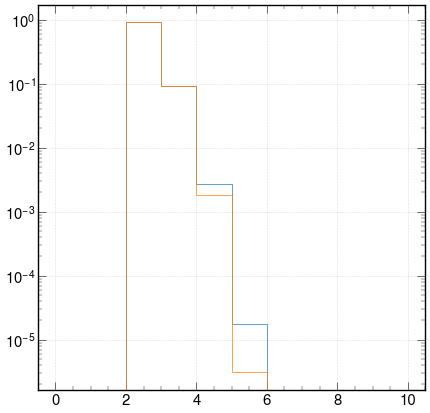

In [207]:
df_high['ngood_fastjets'].hist(bins=np.linspace(0,10,11), histtype='step', density=True)
df_low['ngood_fastjets'].hist(bins=np.linspace(0,10,11), histtype='step', density=True)
plt.yscale('log')

Text(1, 0, 'ngood_ak4jets')

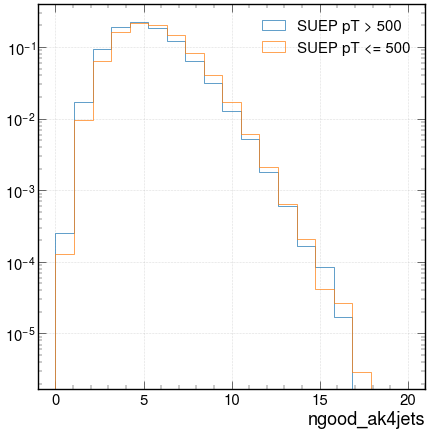

In [208]:
df_high['ngood_ak4jets'].hist(bins=np.linspace(0,20,20), histtype='step', density=True, label='SUEP pT > 500')
df_low['ngood_ak4jets'].hist(bins=np.linspace(0,20,20), histtype='step', density=True, label='SUEP pT <= 500')
plt.yscale('log')
plt.legend()
plt.xlabel('ngood_ak4jets')

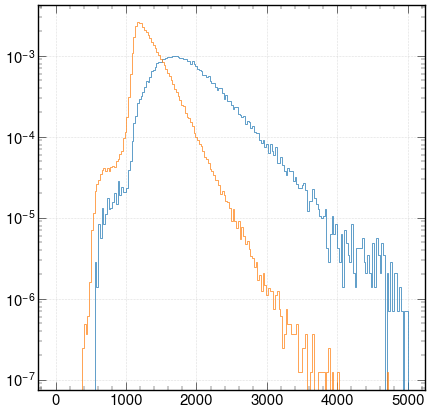

In [209]:
df_high['ht_JEC'].hist(bins=np.linspace(0,5000,200), histtype='step', density=True)
df_low['ht_JEC'].hist(bins=np.linspace(0, 5000,200), histtype='step', density=True)
plt.yscale('log')

In [236]:
df_highconst = df[(df['ntracks'] > 100)]
df_lowconst = df[(df['ntracks'] <= 100)]

Text(1, 0, 'SUEP_pt_CL')

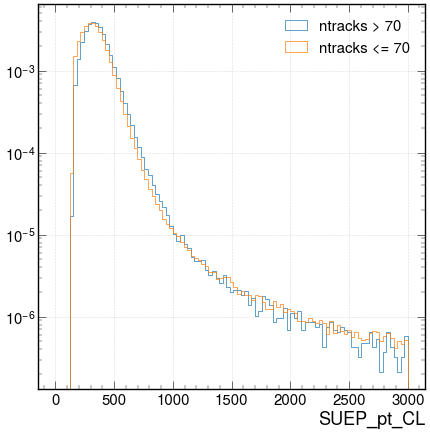

In [238]:
df_highconst['SUEP_pt_CL'].hist(bins=np.linspace(0,3000,100), histtype='step', density=True, label='ntracks > 70')
df_lowconst['SUEP_pt_CL'].hist(bins=np.linspace(0,3000,100), histtype='step', density=True, label='ntracks <= 70')
plt.yscale('log')
plt.legend()
plt.xlabel('SUEP_pt_CL')

Text(1, 0, 'SUEP_eta_CL')

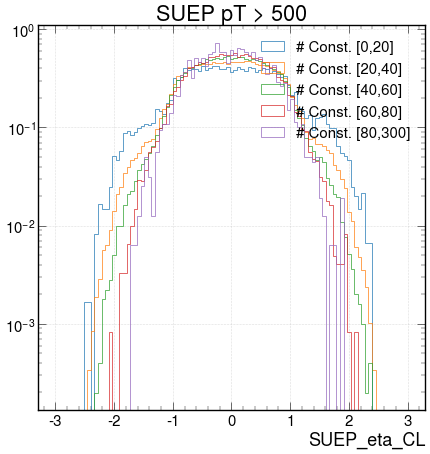

In [278]:
bounds = [0,20,40,60,80,300]
for i in range(len(bounds)-1):
    lb = bounds[i]
    ub = bounds[i+1]
    df1 = df[(df['SUEP_nconst_CL'] > 0) & (df['SUEP_pt_CL'] > 500) & (df['ht_JEC'] > 1200) & (df['SUEP_nconst_CL'] > lb) & (df['SUEP_nconst_CL'] < ub)]
    df1['SUEP_eta_CL'].hist(bins=np.linspace(-3,3,100), histtype='step', density=True, label='# Const. [{},{}]'.format(lb, ub))
    
plt.title("SUEP pT > 500")
plt.yscale('log')
plt.legend()
plt.xlabel('SUEP_eta_CL')

In [8]:
dataDir = '/data/submit//lavezzo/SUEP/outputs/'
files = os.listdir(dataDir)
files = [f for f in files if 'corr' in f and '.pkl' in f]
files

['QCD_HT1500to2000_TuneCP5_PSWeights_13TeV-madgraph-pythia8+RunIISummer20UL18MiniAODv2-106X_upgrade2018_realistic_v16_L1v1-v1+MINIAODSIM_correlation.pkl',
 'QCD_HT2000toInf_TuneCP5_PSWeights_13TeV-madgraph-pythia8+RunIISummer20UL18MiniAODv2-106X_upgrade2018_realistic_v16_L1v1-v1+MINIAODSIM_correlation.pkl',
 'QCD_HT100to200_TuneCP5_PSWeights_13TeV-madgraph-pythia8+RunIISummer20UL18MiniAODv2-106X_upgrade2018_realistic_v16_L1v1-v1+MINIAODSIM_correlation.pkl',
 'QCD_HT1000to1500_TuneCP5_PSWeights_13TeV-madgraph-pythia8+RunIISummer20UL18MiniAODv2-106X_upgrade2018_realistic_v16_L1v1-v1+MINIAODSIM_correlation.pkl',
 'QCD_HT300to500_TuneCP5_PSWeights_13TeV-madgraph-pythia8+RunIISummer20UL18MiniAODv2-106X_upgrade2018_realistic_v16_L1v1-v1+MINIAODSIM_correlation.pkl',
 'QCD_HT50to100_TuneCP5_PSWeights_13TeV-madgraph-pythia8+RunIISummer20UL18MiniAODv2-106X_upgrade2018_realistic_v16_L1v1-v1+MINIAODSIM_correlation.pkl',
 'QCD_HT500to700_TuneCP5_PSWeights_13TeV-madgraph-pythia8+RunIISummer20UL18Min

In [11]:
SUEP_S1, SUEP_nconst, ISR_S1, ISR_nconst = np.array([]), np.array([]), np.array([]), np.array([])
for f in files:
    infile = openpkl(dataDir+f)
    SUEP_S1 = np.concatenate((SUEP_S1, infile['raw_SUEP_S1_Cluster70']))
    SUEP_nconst = np.concatenate((SUEP_nconst, infile['raw_SUEP_nconst_Cluster70']))
    ISR_S1 = np.concatenate((ISR_S1, infile['raw_ISR_S1_Cluster70']))
    ISR_nconst = np.concatenate((ISR_nconst, infile['raw_ISR_nconst_Cluster70']))

In [14]:
from scipy.stats import pearsonr

corr, p_value = pearsonr(SUEP_S1, SUEP_nconst)
print('SUEP, 2018 MC', corr)
corr, p_value = pearsonr(ISR_S1, ISR_nconst)
print('ISR, 2018 MC', corr)

SUEP, 2018 MC 0.9972604682335587
ISR, 2018 MC 0.9940925997214826
